# Read and clean data from May 2016

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os

In [43]:
import datetime as dt

In [3]:
data_dir = '../raw_data'
cwd = os.path.abspath(os.path.curdir)
abspath = os.path.join(cwd , data_dir)

In [4]:
fileList = []
for (dirpath , dirnames , filenames) in os.walk(data_dir):
    fileList.extend(filenames)
    break

In [5]:
fileList

['yellow_tripdata_2016-05.csv']

In [6]:
path_to_file = os.path.join(abspath , fileList[0])
df = pd.read_csv(path_to_file)

In [8]:
df.shape

(11836853, 19)

In [9]:
# check if there are NA data
df_drop = df.dropna()
df_drop.shape

(11836853, 19)

In [10]:
df_drop.columns

Index([u'VendorID', u'tpep_pickup_datetime', u'tpep_dropoff_datetime',
       u'passenger_count', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'RatecodeID', u'store_and_fwd_flag',
       u'dropoff_longitude', u'dropoff_latitude', u'payment_type',
       u'fare_amount', u'extra', u'mta_tax', u'tip_amount', u'tolls_amount',
       u'improvement_surcharge', u'total_amount'],
      dtype='object')

In [182]:
# test slice for removing seconds and minutes
df_test = df_drop.iloc[: , :]

In [183]:
# convert pick up time to pandas time stamp
#df_test['tpep_pickup_datetime'] = df_test.tpep_pickup_datetime.apply(lambda x:pd.to_datetime(x)) 
#df_test['tpep_dropoff_datetime'] = df_test.tpep_dropoff_datetime.apply(lambda x:pd.to_datetime(x)) 

In [184]:
df_test['pick_up_time'] = pd.DatetimeIndex(df_test['tpep_pickup_datetime'])
df_test['drop_time'] = pd.DatetimeIndex(df_test['tpep_dropoff_datetime'])

In [185]:
df_test['hour_pickup'] = pd.DatetimeIndex(df_test['tpep_pickup_datetime']).hour

In [186]:
df_test.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pick_up_time,drop_time,hour_pickup
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,15.0,0.5,0.5,1.50,0.0,0.3,17.80,2016-05-01,2016-05-01 00:17:31,0
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,7.5,0.5,0.5,0.88,0.0,0.3,9.68,2016-05-01,2016-05-01 00:07:31,0
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,6.5,0.5,0.5,1.56,0.0,0.3,9.36,2016-05-01,2016-05-01 00:07:01,0
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,17.0,0.5,0.5,3.66,0.0,0.3,21.96,2016-05-01,2016-05-01 00:19:47,0
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,6.0,0.5,0.5,1.46,0.0,0.3,8.76,2016-05-01,2016-05-01 00:06:39,0


In [187]:
# filter zero duration trips
#time_diff = df_test['drop_time'].astype(dt.timedelta) - df_test['pick_up_time'].astype(dt.timedelta)
time_diff = df_test['drop_time'] - df_test['pick_up_time']

In [188]:
valid_idx = (time_diff > "00:00:00")
df_filt = df_test.loc[valid_idx , :]

In [189]:
df_test.shape

(11836853, 22)

In [190]:
df_filt.shape

(11824526, 22)

In [170]:
# filter zero passengers
df_filt = df_filt.loc[df_filt.passenger_count > 0 , :]

In [171]:
# filter zero distance of trip
df_filt = df_filt.loc[df_filt.trip_distance > 0.0 , :]

In [172]:
# filter points that does not lie inside city
x_low = -74.25559
x_high = -73.70001
y_low = 40.49612
y_high = 40.91553

In [173]:
valid_long_idx = (df_filt.pickup_longitude >= x_low) & (df_filt.pickup_longitude <= x_high)

In [174]:
valid_lat_idx = (df_filt.pickup_latitude >= y_low) & (df_filt.pickup_latitude <= y_high)

In [175]:
valid_pos = valid_long_idx & valid_lat_idx

In [176]:
df_filt = df_filt.loc[valid_pos , :]

In [177]:
df_filt.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pick_up_time,drop_time,hour_pickup
0,1,2016-05-01,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,15.0,0.5,0.5,1.50,0.0,0.3,17.80,2016-05-01,2016-05-01 00:17:31,0
1,2,2016-05-01,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,7.5,0.5,0.5,0.88,0.0,0.3,9.68,2016-05-01,2016-05-01 00:07:31,0
2,2,2016-05-01,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,6.5,0.5,0.5,1.56,0.0,0.3,9.36,2016-05-01,2016-05-01 00:07:01,0
3,2,2016-05-01,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,17.0,0.5,0.5,3.66,0.0,0.3,21.96,2016-05-01,2016-05-01 00:19:47,0
4,2,2016-05-01,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,6.0,0.5,0.5,1.46,0.0,0.3,8.76,2016-05-01,2016-05-01 00:06:39,0


In [193]:
# process region
df_reg = pd.read_csv('regions.csv' ,sep=';' , header=0)

In [194]:
df_reg.head(5)

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [238]:
diff_long = df_reg.loc[: , 'east'] - df_reg.loc[: , 'west']
diff_lat = df_reg.loc[: , 'north']  - df_reg.loc[: , 'south']

In [239]:
# check if the difference is always the same
diff_ch_long = diff_long - diff_long[0]
np.sum(map(np.abs , diff_ch_long))

1.9184653865522705e-11

In [240]:
diff_ch_lat = diff_lat - diff_lat[0]
np.sum(map(np.abs , diff_ch_lat))

1.4921397450962104e-11

In [260]:
# make the grid
# x - grid
last_x = np.max(df_reg.loc[: , 'east'])
tmp_x = list(set(df_reg.loc[: , 'west']))
tmp_x.append(last_x)
binx = np.sort( np.array(tmp_x) )

In [261]:
# y - grid
last_y = np.max(df_reg.loc[: , 'north'])
tmp_y = list(set(df_reg.loc[: , 'south']))
tmp_y.append(last_y)
biny = np.sort( np.array(tmp_y) )

In [257]:
from scipy import stats

In [277]:
df_slice = df_filt.iloc[: , :]

In [278]:
x = df_slice.pickup_longitude
y = df_slice.pickup_latitude

In [279]:
ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[binx,biny])

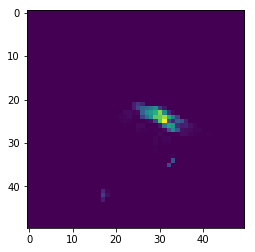

In [281]:
pylab.imshow(ret.statistic)

see that points concentrated in the center of the city 

In [282]:
# find the bin2d where ES placed
long_find = -73.985428
lat_find = 40.748817

In [285]:
x_find = 0
y_find = 0
for x_idx in range(binx.shape[0]):
    if binx[x_idx] > long_find:
        x_find = x_idx - 1
        break

for y_idx in range(biny.shape[0]):
    if biny[y_idx] > lat_find:
        y_find = y_idx - 1
        break
print x_find , y_find

24 30


In [331]:
c_1d = (x_find)*50 + y_find # this is correct 1d representation of bin in case of row by row unwrapping
print c_1d # linear index of ES zone, numeration starts from zero!!!

1230


In [358]:
# number of trips with pickup location of empire state building square
num_es = int(ret.statistic[x_find , y_find])
print num_es

490950


In [363]:
stat_ch = np.squeeze(np.reshape(ret.statistic , (1,-1) , 'C')) # row by row unwrapping
stat_ch[c_1d] # check correctness of unwrapping

490950.0

In [371]:
total_trips = np.sum(np.sum(ret.statistic)) # total number of trips
print total_trips

11675137.0


Finding number of empty squares at the 2d histogram

In [297]:
stat_empy = ret.statistic[np.where(ret.statistic == 0.0)]

In [300]:
num_empty_sq = int(stat_empy.shape[0])
print num_empty_sq # this is number of empt squares of 2d histogram

1125


In [304]:
# brute-force checking
count_e = 0
for y in range(biny.shape[0]-1):
    for x in range(binx.shape[0]-1):
        if ret.statistic[x,y] == 0.0:
            count_e += 1
print count_e

1125


In [348]:
df_filt.shape # check total shape of filtered data frame

(11824526, 22)

In [341]:
# now find distribution of trips from ES square depending on hour of departure
df_slice = df_filt.iloc[: , :]

In [342]:
hours_use = np.sort(list(set(df_slice.hour_pickup)))

In [343]:
hours_use

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [369]:
df_list = []
for hour in hours_use:
    df_cur_hour = df_slice.loc[df_slice.hour_pickup == hour , :]
    x = df_cur_hour.pickup_longitude
    y = df_cur_hour.pickup_latitude
    ret_c = stats.binned_statistic_2d(x, y, None, 'count', bins=[binx,biny])
    stat_c = ret_c.statistic
    stat_1d = np.squeeze(np.reshape(stat_c , (1,-1) , order='C'))
    hour_arr = np.full(stat_1d.shape[0] , hour)
    df_tmp = pd.DataFrame({'hour':hour_arr , 'zone':range(stat_1d.shape[0]) , 'num':stat_1d})
    df_list.append(df_tmp)
df_fin = pd.concat(df_list)

In [372]:
total_num_check = np.sum(df_fin.num) # check that total number of trips does not changed
print total_trips == total_trips

True


In [373]:
# show slice of ES square
df_es = df_fin.loc[df_fin.zone == c_1d , :]

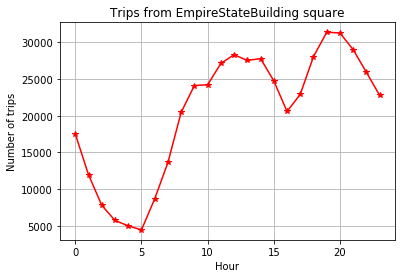

In [374]:
# plot the graphic
x_plot = df_es.hour
y_plot = df_es.num
pylab.plot(x_plot , y_plot , 'r*-')
pylab.grid()
pylab.xlabel('Hour')
pylab.ylabel('Number of trips')
pylab.title('Trips from EmpireStateBuilding square')

In [376]:
num_es_check = np.sum(df_es.num)
print num_es_check == num_es # check if the number of trips from ES square stay the same

True


In [377]:
# just show final data frame
df_fin.head(10) # not too much useful information because first zones are actually empty

,hour,num,zone
0,0,0.0,0
1,0,0.0,1
2,0,0.0,2
3,0,0.0,3
4,0,0.0,4
5,0,0.0,5
6,0,0.0,6
7,0,0.0,7
8,0,0.0,8
9,0,0.0,9


In [378]:
# script of parsing current month (May 2016) of taxi trips is finished!!!